### Data analysis of students who graduated from college between 2010 and 2012

#### Answers we are seeking:
##### 1. Do students with more popular majors make more money?
##### 2. How many majors are predominantly male?
##### 3. Which category of majors have the most students?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
recent_grads = pd.read_csv('recent-grads.csv')

In [9]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [10]:
recent_grads.iloc[0] #first row on the df

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [11]:
#let's get a hang of it...
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [12]:
#check if null exists anywhere...
recent_grads.isnull()
for item in recent_grads.columns:
    if recent_grads[item].isnull().sum() > 0:
        print(item)
    
# these four columns contains null fields

Total
Men
Women
ShareWomen


In [13]:
#find out the number of total rows and assign it to another variable
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [14]:
#let's drop all the rows that contains any null fields
recent_grads.dropna(axis=0, inplace = True)

In [15]:
#Now let's find out the number of rows, after dropping the rows with null fields
cleaned_data_count = recent_grads.shape[0]

In [16]:
print(cleaned_data_count) #172 -- which means that there was one row that contained null fields.

172


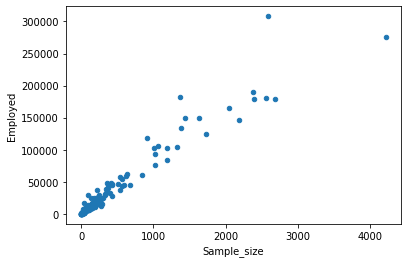

In [17]:
#let's plot this data using the in-built 'plot' method.
recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter')

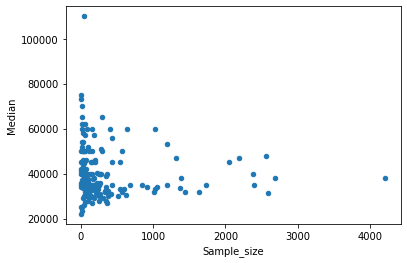

In [18]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')

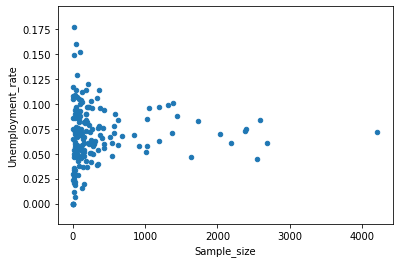

In [19]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')

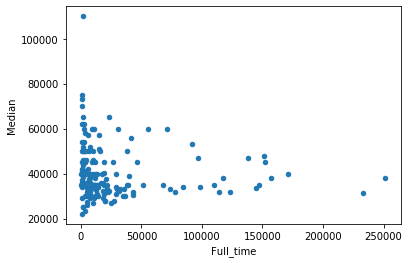

In [20]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter')

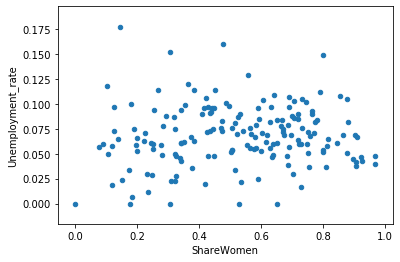

In [21]:
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter')

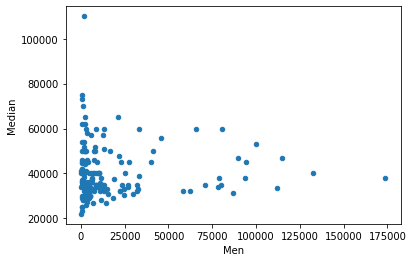

In [22]:
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter')

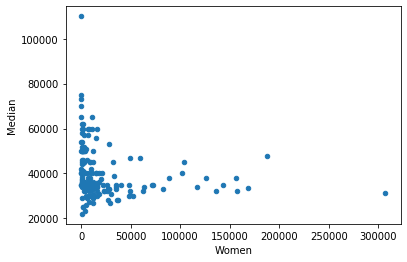

In [23]:
recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter')

#### Now let's plot some histograms to analyse data

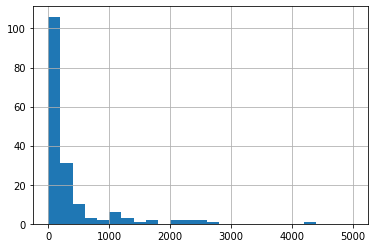

In [24]:
recent_grads['Sample_size'].hist(bins = 25, range = (0, 5000))

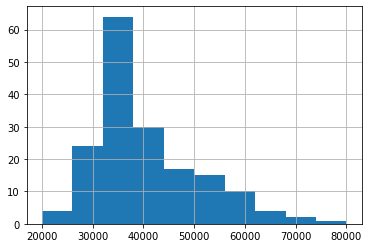

In [25]:
recent_grads['Median'].hist(bins = 10, range = (20000, 80000))

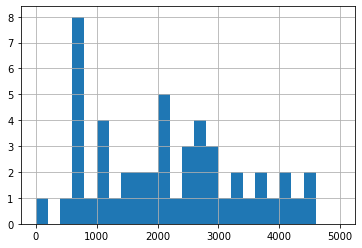

In [26]:
recent_grads['Employed'].hist(bins = 25, range = (0, 5000))

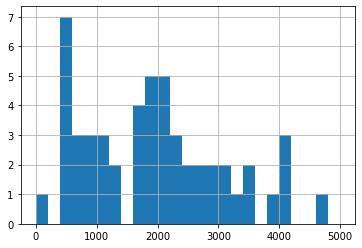

In [27]:
recent_grads['Full_time'].hist(bins = 25, range = (0, 5000))

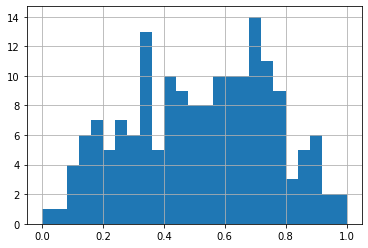

In [28]:
recent_grads['ShareWomen'].hist(bins = 25, range = (0, 1))

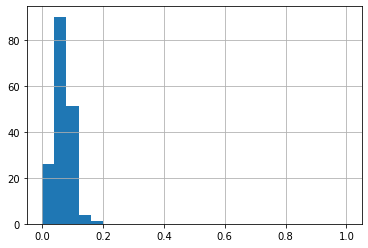

In [29]:
recent_grads['Unemployment_rate'].hist(bins = 25, range = (0, 1))

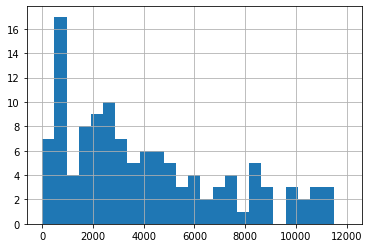

In [30]:
recent_grads['Men'].hist(bins = 25, range = (0, 12000))

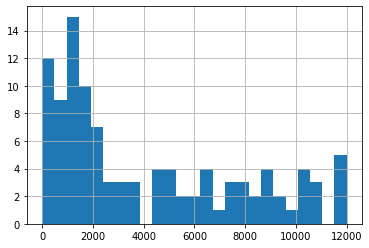

In [31]:
recent_grads['Women'].hist(bins = 25, range = (0, 12000))

#### Using scatter_matrix for showing relationships between two columns.

In [32]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc2172f450>,
      dtype=object)

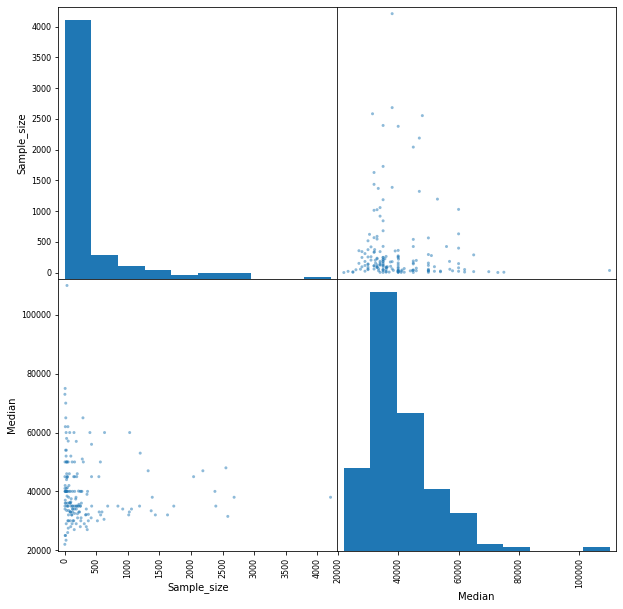

In [38]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc21a0d890>,
      dtype=object)

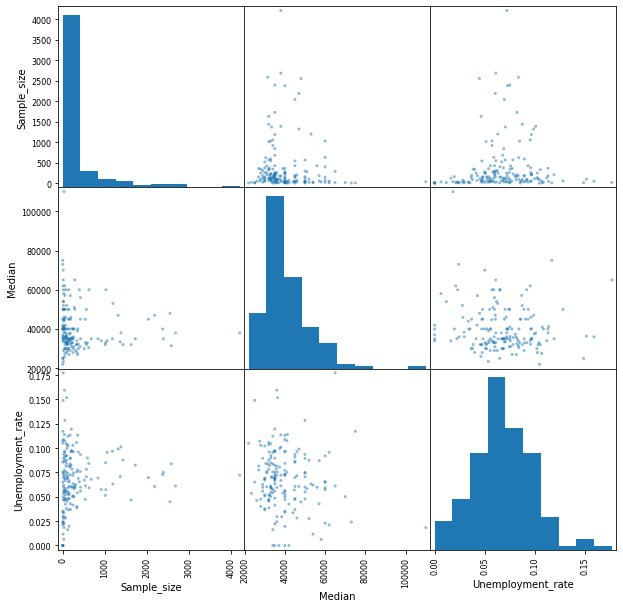

In [40]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

#### Creating bar plots using pandas

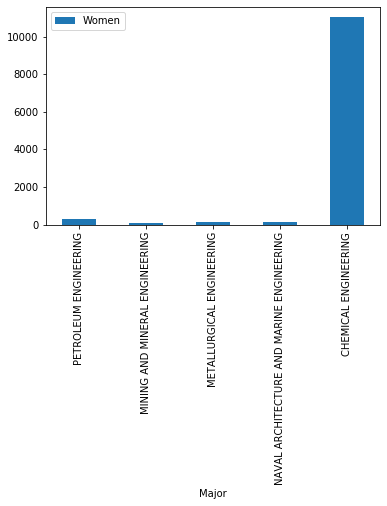

In [41]:
recent_grads[:10].plot.bar(x='Major', y='Women')